In [3]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
stock_max, stock_min, stock_close, stock_amount = np.loadtxt('7.SH600000.txt', delimiter='\t', skiprows=2, usecols=(2, 3, 4, 5), unpack=True)
N = 100
stock_close = stock_close[:N]
print stock_close
print type(stock_close),stock_close.shape

[ 10.06  10.15   9.91   9.63   9.76   9.76   9.83   9.25   9.34   9.38
   9.5    9.56   9.23   9.63   9.89   9.63   9.76   9.27   9.18   9.13
   8.89   8.91   9.29   9.15   9.01   8.89   9.01   9.17   9.14   9.24
   9.17   9.05   9.15   9.79  10.12   9.97   9.76  10.06  10.34  10.36
  10.42  10.66  10.54  10.56  10.31  10.69  11.12  11.    11.04  11.08
  11.12  11.    10.88  11.1   10.79  11.15  11.06  10.99  10.57   9.69
   9.68   9.86   9.47   9.59   9.63   9.42   9.47   9.7    9.47   9.54
   8.79   8.5    8.75   8.62   8.88   9.18   9.     8.56   8.97   8.92
   8.71   8.9    9.2    8.85   8.83   8.95   8.84   8.49   8.42   8.41
   8.29   8.27   7.96   7.82   8.47   8.15   8.24   8.26   8.3    8.75]
<type 'numpy.ndarray'> (100L,)


In [11]:
n = 5
weight = np.ones(n)
weight /= weight.sum()
print weight

a=np.convolve(np.arange(10), [0, 1, 0.5],mode='vallid')
print a.shape

[ 0.2  0.2  0.2  0.2  0.2]
(8L,)


In [14]:
stock_sma = np.convolve(stock_close, weight, mode='valid')  # simple moving average
print stock_ema.shape

(96L,)


In [16]:
weight = np.linspace(1, 0, n)
weight = np.exp(weight)
weight /= weight.sum()
print weight
stock_ema = np.convolve(stock_close, weight, mode='valid')  # exponential moving average
print stock_ema.shape

[ 0.31002201  0.24144538  0.18803785  0.14644403  0.11405072]
(96L,)


In [21]:
t = np.arange(n-1, N)
print n-1,N,t.shape,stock_ema.shape
poly = np.polyfit(t, stock_ema, 10)
print poly
stock_ema_hat = np.polyval(poly, t)
print stock_ema_hat.shape

4 100 (96L,) (96L,)
[ -1.54828672e-16   7.72911233e-14  -1.50730384e-11   1.39225179e-09
  -4.94312199e-08  -1.41407546e-06   1.89122123e-04  -6.62482665e-03
   1.05773566e-01  -7.91122537e-01   1.17765096e+01]
(96L,)


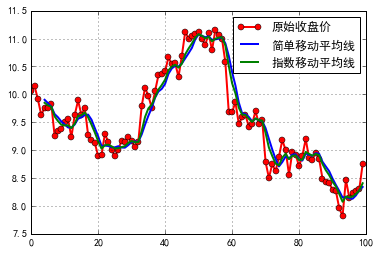

In [22]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.plot(np.arange(N), stock_close, 'ro-', linewidth=2, label=u'原始收盘价')
t = np.arange(n-1, N)
plt.plot(t, stock_sma, 'b-', linewidth=2, label=u'简单移动平均线')
plt.plot(t, stock_ema, 'g-', linewidth=2, label=u'指数移动平均线')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

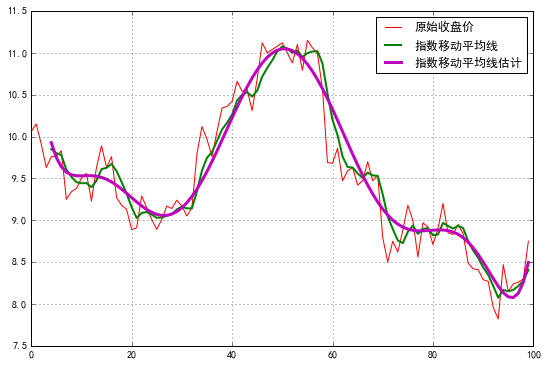

In [24]:
plt.figure(figsize=(9, 6))
plt.plot(np.arange(N), stock_close, 'r-', linewidth=1, label=u'原始收盘价')
plt.plot(t, stock_ema, 'g-', linewidth=2, label=u'指数移动平均线')
plt.plot(t, stock_ema_hat, 'm-', linewidth=3, label=u'指数移动平均线估计')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [25]:
#!/usr/bin/python
#  -*- coding:utf-8 -*-

import numpy as np
import os
from PIL import Image

In [27]:
def convolve(image, weight):
    height, width = image.shape
    h, w = weight.shape
    height_new = height - h + 1
    width_new = width - w + 1
    image_new = np.zeros((height_new, width_new), dtype=np.float)
    for i in range(height_new):
        for j in range(width_new):
            image_new[i,j] = np.sum(image[i:i+h, j:j+w] * weight)
    image_new = image_new.clip(0, 255)
    image_new = np.rint(image_new).astype('uint8')
    return image_new

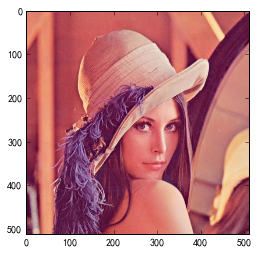

In [53]:
plt.figure(1)
plt.imshow(A)

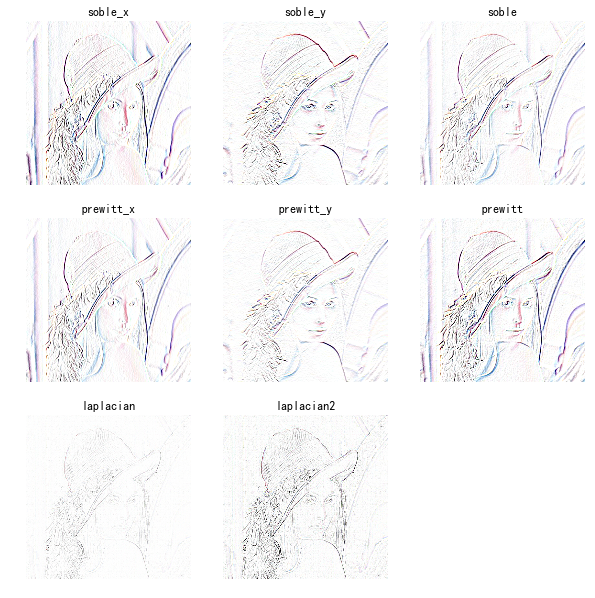

In [56]:
# image_new = 255 * (image_new - image_new.min()) / (image_new.max() - image_new.min())
A = Image.open("7.lena.png", 'r')
output_path = '.\\Pic2\\'

if not os.path.exists(output_path):
    os.mkdir(output_path)
a = np.array(A)
soble_x = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]))
soble_y = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]))
soble = np.array(([-1, -1, 0], [-1, 0, 1], [0, 1, 1]))
prewitt_x = np.array(([-1, 0, 1], [-1, 0, 1], [-1, 0, 1]))
prewitt_y = np.array(([-1, -1,-1], [0, 0, 0], [1, 1, 1]))
prewitt = np.array(([-2, -1, 0], [-1, 0, 1], [0, 1, 2]))
laplacian = np.array(([0, -1, 0], [-1, 4, -1], [0, -1, 0]))
laplacian2 = np.array(([-1, -1, -1], [-1, 8, -1], [-1, -1, -1]))
weight_list = ('soble_x', 'soble_y', 'soble', 'prewitt_x', 'prewitt_y', 'prewitt', 'laplacian', 'laplacian2')
plt.figure(figsize=(10,10))
K=len(weight_list)
k=1
for weight in weight_list:
    #print weight, '\n',eval(weight)
    R = convolve(a[:, :, 0], eval(weight))
    #print 'G',
    G = convolve(a[:, :, 1], eval(weight))
    #print 'B'
    B = convolve(a[:, :, 2], eval(weight))
    I = 255 - np.stack((R, G, B), 2)
    #Image.fromarray(I).save(output_path + weight + '.png')
    plt.subplot(K/3+1, 3, k)
    plt.imshow(I)
    plt.axis('off')
    plt.title(weight)
    k=k+1

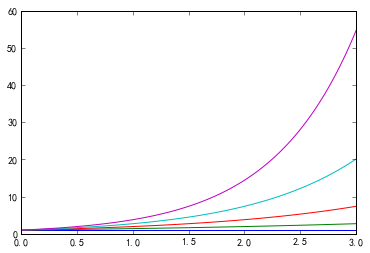

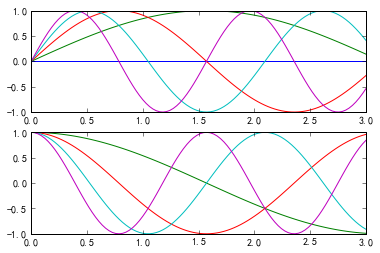

In [50]:
plt.figure(1)#创建图表1  
plt.figure(2)#创建图表2  
ax1=plt.subplot(211)#在图表2中创建子图1  
ax2=plt.subplot(212)#在图表2中创建子图2  
x=np.linspace(0,3,100)  
for i in xrange(5):  
    plt.figure(1)  
    plt.plot(x,np.exp(i*x/3))  
    plt.sca(ax1)  
    plt.plot(x,np.sin(i*x))  
    plt.sca(ax2)  
    plt.plot(x,np.cos(i*x))  
plt.show()  

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] R G B


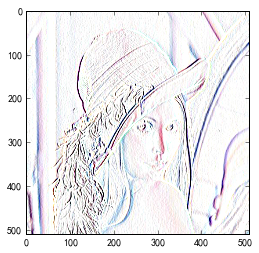

In [38]:
def convolve(image, weight):
    height, width = image.shape
    h, w = weight.shape
    height_new = height - h + 1
    width_new = width - w + 1
    image_new = np.zeros((height_new, width_new), dtype=np.float)
    for i in range(height_new):
        for j in range(width_new):
            image_new[i,j] = np.sum(image[i:i+h, j:j+w] * weight)
    image_new = image_new.clip(0, 255)
    image_new = np.rint(image_new).astype('uint8')
    return image_new

A = Image.open("7.lena.png", 'r')
a = np.array(A)
weight=soble_x
print weight, 'R',
R = convolve(a[:, :, 0], weight)
print 'G',
G = convolve(a[:, :, 1], weight)
print 'B'
B = convolve(a[:, :, 2], weight)
I = 255-np.stack((R, G, B), 2)
plt.imshow(I)

梯度检测XY：
soble_x R G B
soble_y R G B
soble R G B
prewitt_x R G B


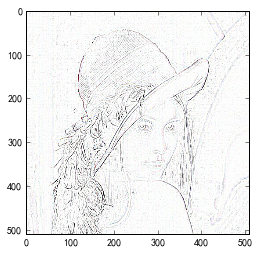

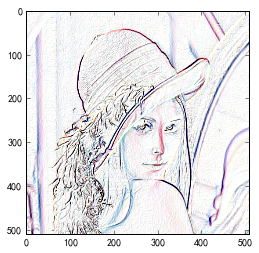

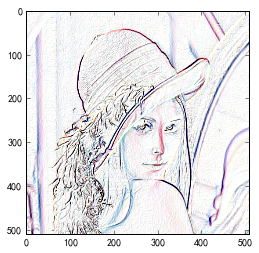

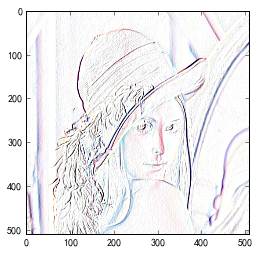

In [58]:
# X & Y
print '梯度检测XY：'
for w in (0, 2):
    weight = weight_list[w]
    print weight, 'R',
    R = convolve(a[:, :, 0], eval(weight))
    print 'G',
    G = convolve(a[:, :, 1], eval(weight))
    print 'B'
    B = convolve(a[:, :, 2], eval(weight))
    I1 = np.stack((R, G, B), 2)
    plt.figure(w)
    plt.imshow(I)
    
    weight = weight_list[w+1]
    print weight, 'R',
    R = convolve(a[:, :, 0], eval(weight))
    print 'G',
    G = convolve(a[:, :, 1], eval(weight))
    print 'B'
    B = convolve(a[:, :, 2], eval(weight))
    I2 = np.stack((R, G, B), 2)

    I = 255 - np.maximum(I1, I2)
    plt.figure(w+1)
    plt.imshow(I)
    #Image.fromarray(I).save(output_path + weight[:-2] + '.png')

In [ ]:
    A = Image.open("7.lena.png", 'r')
    output_path = '.\\Pic2\\'
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    a = np.array(A)
    soble_x = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]))
    soble_y = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]))
    soble = np.array(([-1, -1, 0], [-1, 0, 1], [0, 1, 1]))
    prewitt_x = np.array(([-1, 0, 1], [-1, 0, 1], [-1, 0, 1]))
    prewitt_y = np.array(([-1, -1,-1], [0, 0, 0], [1, 1, 1]))
    prewitt = np.array(([-2, -1, 0], [-1, 0, 1], [0, 1, 2]))
    laplacian = np.array(([0, -1, 0], [-1, 4, -1], [0, -1, 0]))
    laplacian2 = np.array(([-1, -1, -1], [-1, 8, -1], [-1, -1, -1]))
    weight_list = ('soble_x', 'soble_y', 'soble', 'prewitt_x', 'prewitt_y', 'prewitt', 'laplacian', 'laplacian2')
    print '梯度检测：'
    for weight in weight_list:
        print weight, 'R',
        R = convolve(a[:, :, 0], eval(weight))
        print 'G',
        G = convolve(a[:, :, 1], eval(weight))
        print 'B'
        B = convolve(a[:, :, 2], eval(weight))
        I = 255 - np.stack((R, G, B), 2)
        Image.fromarray(I).save(output_path + weight + '.png')